<a href="https://colab.research.google.com/github/MrsIgnis/MMO_tasks/blob/main/MMO_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**I. Загрузка библиотек и предоработка данных**

In [71]:
!pip install pandas scikit-learn seaborn scipy
!pip install mlxtend  # Для работы с SequentialFeatureSelector

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [73]:
df = pd.read_csv('/content/pokemon.csv')

In [74]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [75]:
df['Legendary'] = df['Legendary'].astype(int)
df.Legendary = df.Legendary.astype('category') # Чтобы эти значения не попадали в числовые и мы работали только с этим столбцом
df['Type 1'] = df['Type 1'].astype('category')
df['Type 2'] = df['Type 2'].astype('category')
df['Generation'] = df['Generation'].astype('category')  # Generation - это тоже дискретная переменная

In [76]:
Y = df['Legendary']
df = df.drop('#', axis=1) # Удаляю столбец #, это индексы
df = df.drop('Name', axis=1) # Удаляю столбец Name
X = df.drop('Legendary', axis=1)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Type 1      800 non-null    category
 1   Type 2      414 non-null    category
 2   Total       800 non-null    int64   
 3   HP          800 non-null    int64   
 4   Attack      800 non-null    int64   
 5   Defense     800 non-null    int64   
 6   Sp. Atk     800 non-null    int64   
 7   Sp. Def     800 non-null    int64   
 8   Speed       800 non-null    int64   
 9   Generation  800 non-null    category
 10  Legendary   800 non-null    category
dtypes: category(4), int64(7)
memory usage: 48.7 KB


In [78]:
df

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Fire,NaN,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,1
796,Rock,Fairy,700,50,160,110,160,110,110,6,1
797,Psychic,Ghost,600,80,110,60,150,130,70,6,1
798,Psychic,Dark,680,80,160,60,170,130,80,6,1


# **II. Масштабирование признаков**

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Type 1      800 non-null    category
 1   Type 2      414 non-null    category
 2   Total       800 non-null    int64   
 3   HP          800 non-null    int64   
 4   Attack      800 non-null    int64   
 5   Defense     800 non-null    int64   
 6   Sp. Atk     800 non-null    int64   
 7   Sp. Def     800 non-null    int64   
 8   Speed       800 non-null    int64   
 9   Generation  800 non-null    category
dtypes: category(3), int64(7)
memory usage: 47.8 KB


In [80]:
# Создаем копию данных
X_processed = X.copy()

category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns # Собираем колонки, помеченные как category

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=category_columns, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.

In [81]:
X_processed

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,318,45,49,49,65,65,45,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,405,60,62,63,80,80,60,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,525,80,82,83,100,100,80,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,625,80,100,123,122,120,80,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,309,39,52,43,60,50,65,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,False,False,False,...,False,False,False,False,False,False,False,False,False,True
796,700,50,160,110,160,110,110,False,False,False,...,False,False,False,False,False,False,False,False,False,True
797,600,80,110,60,150,130,70,False,False,False,...,False,False,False,False,False,False,False,False,False,True
798,680,80,160,60,170,130,80,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [82]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [83]:
X_processed

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,0.230000,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0.375000,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.575000,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,0.741667,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,0.215000,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.700000,0.192913,0.513514,0.644444,0.489130,0.619048,0.257143,False,False,False,...,False,False,False,False,False,False,False,False,False,True
796,0.866667,0.192913,0.837838,0.466667,0.815217,0.428571,0.600000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
797,0.700000,0.311024,0.567568,0.244444,0.760870,0.523810,0.371429,False,False,False,...,False,False,False,False,False,False,False,False,False,True
798,0.833333,0.311024,0.837838,0.244444,0.869565,0.523810,0.428571,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# **III. Очистка данных и удаление выбросов**

In [84]:
# Функция обучения с оценкой качества
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
  # Разделение данных на обучающую и тестовую выборки
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

  # Инициализация модели
  model = LogisticRegression(max_iter=1000)

  # Обучение модели
  model.fit(X_train, Y_train)

  # Предсказания на обучающей выборке
  Y_train_pred = model.predict(X_train)
  train_accuracy = accuracy_score(Y_train, Y_train_pred)

  # Предсказания на тестовой выборке
  Y_test_pred = model.predict(X_test)
  test_accuracy = accuracy_score(Y_test, Y_test_pred)

  # Вывод результатов
  print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
  print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

  # Классификационный отчет
  print("\nКлассификационный отчет на тестовой выборке:")
  print(classification_report(Y_test, Y_test_pred))

  return model

In [85]:
train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9578
Точность на тестовой выборке: 0.9062

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       147
           1       0.33      0.15      0.21        13

    accuracy                           0.91       160
   macro avg       0.63      0.56      0.58       160
weighted avg       0.88      0.91      0.89       160



LogisticRegression(max_iter=1000)

**Метод 1: удаление на основе медианы**

In [86]:
# Функция для удаления выбросов на основе межквартильного размаха (1.5 IQR)
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    # Вычисляем межквартильный размах (IQR)
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [87]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

In [88]:
X_processed.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.425171,0.268735,0.400007,0.305967,0.341413,0.247155,0.361586
std,0.199938,0.100530,0.175445,0.138593,0.177839,0.132519,0.166060
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.192913,0.270270,0.200000,0.216033,0.142857,0.228571
50%,0.450000,0.251969,0.378378,0.288889,0.298913,0.238095,0.342857
75%,0.558333,0.311024,0.513514,0.377778,0.461957,0.333333,0.485714
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
X_iqr.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,0.424060,0.266531,0.401035,0.304176,0.342569,0.245526,0.362929
std,0.199942,0.092369,0.173687,0.131538,0.177727,0.129649,0.165745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.192913,0.270270,0.200000,0.217391,0.142857,0.228571
50%,0.450000,0.251969,0.378378,0.288889,0.298913,0.238095,0.342857
75%,0.558333,0.311024,0.513514,0.377778,0.461957,0.333333,0.485714
max,1.000000,0.665354,1.000000,0.866667,1.000000,0.857143,1.000000


In [90]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.9480
Точность на тестовой выборке: 0.9245

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       146
           1       0.60      0.23      0.33        13

    accuracy                           0.92       159
   macro avg       0.77      0.61      0.65       159
weighted avg       0.91      0.92      0.91       159



LogisticRegression(max_iter=1000)

Анализ выводов: точность практически не изменилась, буквально на пару сотых - тысячных единиц. Изначальные данные тоже не сильно отличаются от тех, что мы получили после применения метода на основе медианы (различие также буквально в пару - тройку единиц. А стандартное отклонение даже чуть больше стало в Total). Метрики качества гораздо лучше стали, в особенности при нахождении верных данных среди всех отобранных и среди всех верных, существующих в датафрейме. Это видно по тому, что при поиске 1 precision, recall и f1-score увеличились больше, чем другие параметры.). Следовательно, метод межквартильного размаха довольно хорошо справился и улучшил модель.


**Метод 2: удаление на основе среднего**

In [91]:
# Функция для удаления выбросов на основе среднего значения

def remove_outliers_based_on_mean(X, y, mean_multiplier=4):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем среднее значение и стандартное отклонение для каждой переменной
    mean_values = X_numeric.mean()
    std_values = X_numeric.std()

    # Устанавливаем верхний и нижний пороги на основе среднего значения и множителя стандартного отклонения
    lower_threshold = mean_values - mean_multiplier * std_values
    upper_threshold = mean_values + mean_multiplier * std_values

    # Фильтруем наблюдения, которые находятся в пределах этих порогов по всем признакам
    X_filtered = X_numeric[~((X_numeric < lower_threshold) | (X_numeric > upper_threshold)).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [92]:
X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

In [93]:
X_processed.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.425171,0.268735,0.400007,0.305967,0.341413,0.247155,0.361586
std,0.199938,0.100530,0.175445,0.138593,0.177839,0.132519,0.166060
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.192913,0.270270,0.200000,0.216033,0.142857,0.228571
50%,0.450000,0.251969,0.378378,0.288889,0.298913,0.238095,0.342857
75%,0.558333,0.311024,0.513514,0.377778,0.461957,0.333333,0.485714
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
X_mean.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,0.423287,0.266388,0.401052,0.302604,0.342666,0.244621,0.363475
std,0.199897,0.092513,0.173876,0.128634,0.177898,0.127961,0.165789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.192913,0.270270,0.200000,0.217391,0.142857,0.228571
50%,0.446667,0.251969,0.378378,0.288889,0.298913,0.238095,0.342857
75%,0.557500,0.311024,0.513514,0.377778,0.461957,0.333333,0.485714
max,1.000000,0.665354,1.000000,0.795556,1.000000,0.666667,1.000000


In [95]:
train_and_evaluate(X_mean, y_mean)

Точность на обучающей выборке: 0.9430
Точность на тестовой выборке: 0.9434

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       146
           1       0.75      0.46      0.57        13

    accuracy                           0.94       159
   macro avg       0.85      0.72      0.77       159
weighted avg       0.94      0.94      0.94       159



LogisticRegression(max_iter=1000)

Анализ выводов: я изменила пороговое значение среднего с 2 на 4, потому что в параметрах классификационного отчета модель вообще не нашла данные, которые относятся к 1 категории (просто 0 в precision, recall и f1-score), что не является хорошим результатом.
По сравнению с предыдущим методом, в этом способе обрезалось практически столько же данных - не более 10 строк. Насчет точности: если сравнивать изначальный классификационный отчет (до применения моделей), то точность на обучающей выборке на 1% стала хуже, но на тестовой, наоборот, почти на 4% выросла, что говорит о том, что модель лучше стала искать закономерности между старыми и новыми данными. Если сравнивать с первым методом, то также - на обучающей чуть хуже, на тестовой получше получилось. Выросла и вероятность нахождения правильных и неправильных данных (в особенности модель стала лучше отбирать верные данные среди всех отобранных и среди всех верных, существующих в датафрейме). Но если сравнить метод нахождения по межквартильному размаху и по среднему, то второй справился чуть лучше (в особенности в отнесении к правильным значениям. Если в неправильных значениях модель буквально на 1 - 2% улучшила свой поиск, то в отношении правильных значений её точность сильно выросла - порядком на 10 - 15%, что для нас является хорошим результатом).

#**IV. Методы отбора признаков**

**1. Filter методы**

In [96]:
from sklearn.feature_selection import SelectKBest, f_regression

In [98]:
selector = SelectKBest(score_func=f_regression, k=3)
X_kbest = selector.fit_transform(X_processed, Y)

In [99]:
selector.scores_

array([2.68504829e+02, 6.45792955e+01, 1.08104284e+02, 5.15702097e+01,
       2.01396010e+02, 1.21831948e+02, 9.53598016e+01, 1.20691319e-01,
       4.03798419e+01, 5.80519951e-02, 1.16749418e-01, 2.47261653e+00,
       1.65108899e-01, 9.53225652e+00, 1.56624141e-01, 1.51384466e+00,
       8.53475936e-01, 1.43499371e-03, 5.56279035e+00, 2.56782178e+00,
       2.27881995e+01, 5.80519951e-02, 1.67457664e+00, 3.62480222e+00,
       2.67770858e-01, 4.92021994e+00, 5.89819375e-01, 1.03047521e-02,
       1.89702464e+00, 4.66288875e+00, 4.12880307e+00, 1.83673702e-02,
       2.28301056e+00, 1.35955266e+00, 3.38424706e+00, 3.54787962e-01,
       3.14475749e+00, 2.27728991e+00, 1.25898058e+00, 3.87517986e-01,
       1.83673702e-02, 1.90092882e+00, 2.61845387e+00, 1.30862311e+00,
       2.59242356e-01, 3.24943805e-01])

In [100]:
X_processed.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Type 1_Dark', 'Type 1_Dragon', 'Type 1_Electric', 'Type 1_Fairy',
       'Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying', 'Type 1_Ghost',
       'Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice', 'Type 1_Normal',
       'Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock', 'Type 1_Steel',
       'Type 1_Water', 'Type 2_Dark', 'Type 2_Dragon', 'Type 2_Electric',
       'Type 2_Fairy', 'Type 2_Fighting', 'Type 2_Fire', 'Type 2_Flying',
       'Type 2_Ghost', 'Type 2_Grass', 'Type 2_Ground', 'Type 2_Ice',
       'Type 2_Normal', 'Type 2_Poison', 'Type 2_Psychic', 'Type 2_Rock',
       'Type 2_Steel', 'Type 2_Water', 'Generation_2', 'Generation_3',
       'Generation_4', 'Generation_5', 'Generation_6'],
      dtype='object')

In [101]:
X_processed

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,0.230000,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0.375000,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.575000,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,0.741667,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,0.215000,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.700000,0.192913,0.513514,0.644444,0.489130,0.619048,0.257143,False,False,False,...,False,False,False,False,False,False,False,False,False,True
796,0.866667,0.192913,0.837838,0.466667,0.815217,0.428571,0.600000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
797,0.700000,0.311024,0.567568,0.244444,0.760870,0.523810,0.371429,False,False,False,...,False,False,False,False,False,False,False,False,False,True
798,0.833333,0.311024,0.837838,0.244444,0.869565,0.523810,0.428571,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [102]:
selector.get_support(indices=True)

array([0, 4, 5])

In [103]:
# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['Total', 'Sp. Atk', 'Sp. Def'], dtype='object')


In [104]:
# Преобразуем X_kbest в DataFrame
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

# Обучаем и оцениваем модель
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.9422
Точность на тестовой выборке: 0.9250

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       147
           1       0.67      0.15      0.25        13

    accuracy                           0.93       160
   macro avg       0.80      0.57      0.61       160
weighted avg       0.91      0.93      0.90       160



LogisticRegression(max_iter=1000)

Анализ выводов: изначально k = 5, результаты метода несильно отличались от методов удаления выбросов. После я поставила k = 3 и k = 7 для сравнения. С 7 модель переобучилась (в precision и recall появились 1, что для нас плохо). Поэтому я остановилась на k = 3. В сравнении с 5 модель чуть улучшилась. Конечно, точность на тестовой выборке на 1% меньше стала, а на обучающей, наоборот, на 1% больше. Но зато по метрикам она значительно улучшилась: в нахождении верных значений из всех найденных, существующих в датасете, выросла с 0.50 на 0.67.

In [105]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [106]:
# Применяем SelectKBest с mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=3)
X_selected = selector.fit_transform(X_processed, Y)

In [107]:
selector.scores_

array([0.22362405, 0.11356093, 0.07389103, 0.04688759, 0.10692591,
       0.08689649, 0.07044508, 0.        , 0.01769913, 0.        ,
       0.00685853, 0.01188304, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00258732, 0.        ,
       0.01536102, 0.        , 0.0107892 , 0.01700353, 0.00491016,
       0.        , 0.00902948, 0.00188694, 0.00256286, 0.00661862,
       0.        , 0.01561642, 0.        , 0.00149148, 0.        ,
       0.00030523, 0.        , 0.        , 0.0106244 , 0.00588954,
       0.00358716, 0.0007514 , 0.        , 0.        , 0.00244427,
       0.0114545 ])

In [108]:
X_processed.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Type 1_Dark', 'Type 1_Dragon', 'Type 1_Electric', 'Type 1_Fairy',
       'Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying', 'Type 1_Ghost',
       'Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice', 'Type 1_Normal',
       'Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock', 'Type 1_Steel',
       'Type 1_Water', 'Type 2_Dark', 'Type 2_Dragon', 'Type 2_Electric',
       'Type 2_Fairy', 'Type 2_Fighting', 'Type 2_Fire', 'Type 2_Flying',
       'Type 2_Ghost', 'Type 2_Grass', 'Type 2_Ground', 'Type 2_Ice',
       'Type 2_Normal', 'Type 2_Poison', 'Type 2_Psychic', 'Type 2_Rock',
       'Type 2_Steel', 'Type 2_Water', 'Generation_2', 'Generation_3',
       'Generation_4', 'Generation_5', 'Generation_6'],
      dtype='object')

In [109]:
X_processed

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,0.230000,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0.375000,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.575000,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,0.741667,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,0.215000,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.700000,0.192913,0.513514,0.644444,0.489130,0.619048,0.257143,False,False,False,...,False,False,False,False,False,False,False,False,False,True
796,0.866667,0.192913,0.837838,0.466667,0.815217,0.428571,0.600000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
797,0.700000,0.311024,0.567568,0.244444,0.760870,0.523810,0.371429,False,False,False,...,False,False,False,False,False,False,False,False,False,True
798,0.833333,0.311024,0.837838,0.244444,0.869565,0.523810,0.428571,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [110]:
selector.get_support(indices=True)

array([0, 1, 4])

In [111]:
# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['Total', 'HP', 'Sp. Atk'], dtype='object')


In [112]:
# Преобразуем X_kbest в DataFrame
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

# Обучаем и оцениваем модель
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.9422
Точность на тестовой выборке: 0.9250

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       147
           1       0.67      0.15      0.25        13

    accuracy                           0.93       160
   macro avg       0.80      0.57      0.61       160
weighted avg       0.91      0.93      0.90       160



LogisticRegression(max_iter=1000)

Анализ выводов: данные в отчетах обоих Filter методов идентичные, поэтому можно смело сказать, что метод mutual_info_classif, который узнаёт, сколько информации о целевой переменной содержится в остальных признаках, также хорошо работает на этом датасете.

**2. Wrapper методы**

In [113]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LogisticRegression(max_iter=1000)

rfe = RFE(estimator=base_model, n_features_to_select=3)
rfe.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['Total', 'Sp. Atk', 'Sp. Def'], dtype='object')


In [114]:
# Отбираем признаки
X_rfe = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_rfe, Y)

Точность на обучающей выборке: 0.9422
Точность на тестовой выборке: 0.9250

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       147
           1       0.67      0.15      0.25        13

    accuracy                           0.93       160
   macro avg       0.80      0.57      0.61       160
weighted avg       0.91      0.93      0.90       160



Анализ выводов: также как и при f_regression, модель переобучается при k = 7, а при k = 3 она показывает наилучшие результаты, точнее находя верные данные в датасете.

**3. Embedded методы**

Коэффициенты модели без регуляризации: [[ 3.86752944  1.44042067  1.48022474  1.53646741  2.53778973  2.36706254
   2.03989536 -0.1941427   0.53909904  0.23951923 -0.13581969 -0.57271973
   0.17644214  0.85949893 -0.02146675 -0.07674497  0.54844824  0.31140133
  -0.65817679 -0.3792883   0.92026876  0.32787582  0.40674998 -0.42578657
  -0.61570618  0.00470082  0.13673402 -0.30446178 -0.02958223  0.10155388
   0.45427837 -0.07572423 -0.58803707 -0.64432195  0.08790952 -0.178977
  -0.57868786  0.09436252 -0.29125839 -0.37863991  0.15168832  0.15305216
   0.4702431   0.66688867  0.71927641  0.68993879]]

Коэффициенты модели с регуляризацией: [[13.48730163  0.          0.          0.          0.35100125  0.70366396
   0.33300683  0.          0.          0.11125751  0.          0.
   0.          0.50947842  0.          0.          0.          0.
  -0.85045539  0.          0.77076896  0.          0.         -0.52044447
  -0.69852474  0.          0.          0.          0.          0.
   0.312

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


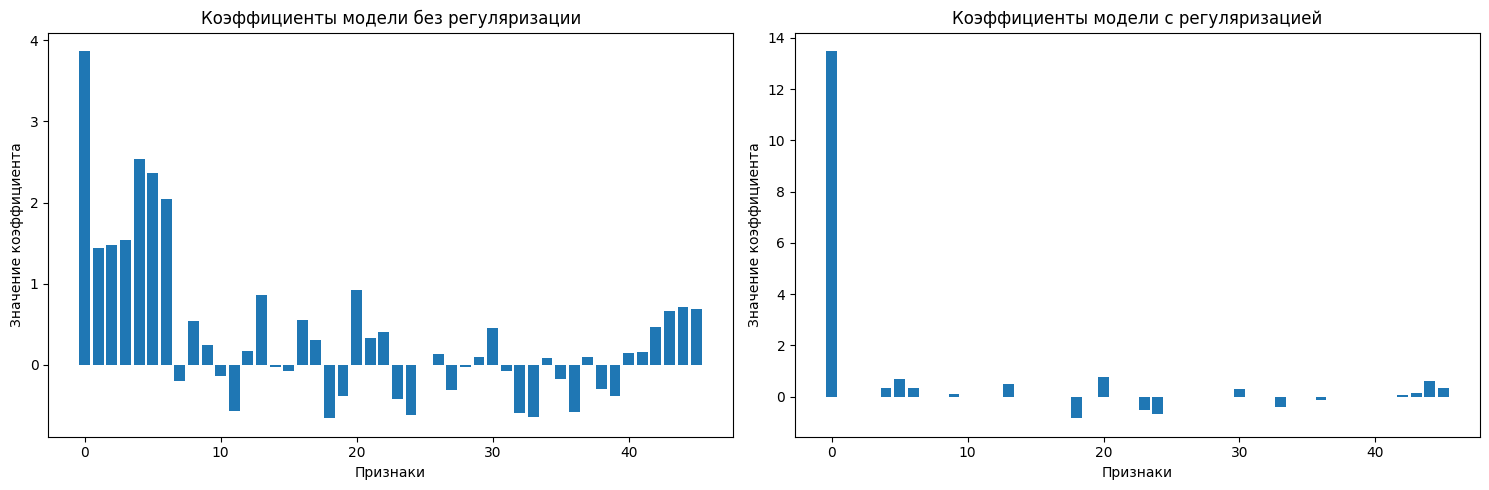

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("\nКоэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("\nОтобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("\nКоэффициенты модели после отбора признаков:", coefficients_embedded)

# Визуализация коэффициентов моделей
plt.figure(figsize=(15, 5))

# Коэффициенты модели без регуляризации
plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

# Коэффициенты модели с регуляризацией
plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()
plt.show()

In [116]:
# Преобразуем X_embedded в DataFrame
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

# Обучаем и оцениваем модель
model = train_and_evaluate(X_embedded_df, Y)

Точность на обучающей выборке: 0.9453
Точность на тестовой выборке: 0.9187

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       147
           1       0.50      0.15      0.24        13

    accuracy                           0.92       160
   macro avg       0.71      0.57      0.60       160
weighted avg       0.89      0.92      0.90       160



Анализ выводов: в сравнении с остальными методами здесь модель чуть хуже себя проявила в плане точности и нахождения верных ответов среди всех отобранных (данные ее отчета можно сравнить с тем, когда k = 5 в моделях выше).

#**V. Кросс-валидация**

SequentialFeatureSelector: грубо говоря, у этого метода есть два пути реализации: он начинает с пустого датасета и поочереди добавляет в него признаки, ориентируясь на то, улучшается ли производительность модели или нет. Завершает тогда, когда новые данные больше не дают значительного прироста.
Второй путь в точности да наоборот: метод удаляет самые малозначимые на данном шаге признаки и останавливается перед тем, как производительность модели может ухудшиться.

In [117]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

model_2 = LogisticRegression(max_iter=1000)
sfs = SFS(estimator=model_2, k_features=5)

sfs = sfs.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features_2 = list(sfs.k_feature_names_)
print(f"Выбранные признаки: {selected_features_2}")

Выбранные признаки: ['Total', 'HP', 'Sp. Atk', 'Sp. Def', 'Generation_5']


In [118]:
# Отбираем признаки
X_sfs = X_processed[selected_features_2]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_sfs, Y)

Точность на обучающей выборке: 0.9437
Точность на тестовой выборке: 0.9250

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       147
           1       0.67      0.15      0.25        13

    accuracy                           0.93       160
   macro avg       0.80      0.57      0.61       160
weighted avg       0.91      0.93      0.90       160



Анализ выводов: в целом, результат довольно хороший (такой же, как когда в моделях выше брали k = 3). Чуть лучше, чем в Embedded методе. Но это - единственная модель, которая в качестве лучшего признака выбрала Generation_5 (до этого была либо Attack, либо Defense). И да, модель с этим методом дольше выполнялась в сравнении с предыдущими.

**1. K-Fold Cross-Validation**

In [119]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

In [120]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# K-Fold Cross-Validation
def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

model_2 = LogisticRegression(max_iter=1000)
sfs = SFS(estimator=model_2, k_features=5)

sfs = sfs.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features_2 = list(sfs.k_feature_names_)
print(f"Выбранные признаки: {selected_features_2}")

X_sfs = X_processed[selected_features_2]

# Пример использования:
k_fold_cross_validation(X_sfs, Y)

Выбранные признаки: ['Total', 'HP', 'Sp. Atk', 'Sp. Def', 'Generation_5']
K-Fold Cross-Validation - Средняя точность: 0.93875
Точности по каждому фолду: [0.95625, 0.95, 0.9375, 0.925, 0.925]


Анализ выводов: по результатам отбора признаков лучше всего себя проявил метод SequentialFeatureSelector. Что касается точности кросс-валидации, то среднее отклоние небольшое, разброса данных практически нет, все значения находятся практически около среднего.

**2. ShuffleSplit Cross-Validation**

In [121]:
# Функция для ShuffleSplit Cross-Validation
def shuffle_split_cross_validation(X, y, n_splits=7, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies):.4f}")
    print(f"Точности по каждому разделению: {accuracies}")

# Удаляем выбросы из данных
X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

# Преобразуем очищенные данные в numpy для работы с ShuffleSplit
X_mean_np = X_mean.to_numpy()
y_mean_np = y_mean.to_numpy()

# Выполняем ShuffleSplit Cross-Validation на очищенных данных
shuffle_split_cross_validation(X_mean_np, y_mean_np)


ShuffleSplit Cross-Validation - Средняя точность: 0.9378
Точности по каждому разделению: [0.9337539432176656, 0.9274447949526814, 0.9369085173501577, 0.9274447949526814, 0.9589905362776026, 0.9400630914826499, 0.9400630914826499]


Анализ выводов: при n_splits = 7 точность стала чуть выше в сравнении с 5, а тем более и 3. Также, как и с K-Fold Cross-Validation точности параметров несильно отличаются от средней. Значит и здесь разброс данных незначительный.

**3. Train-Test-Validation Split**

In [122]:
# Train-Test-Validation Split
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Удаляем выбросы из данных
X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

# Преобразуем очищенные данные в numpy для работы с ShuffleSplit
X_mean_np = X_mean.to_numpy()
y_mean_np = y_mean.to_numpy()

# Выполняем ShuffleSplit Cross-Validation на очищенных данных
train_test_validation_split(X_mean_np, y_mean_np)

Точность на валидационных данных: 0.9308176100628931
Точность на тестовых данных: 0.968503937007874


Анализ выводов: этот метод, в сравнении с двумя предыдущими, чуть хуже справился на валидационных данных (буквально на пару - тройку тысячных единиц). Но на тестовых он достиг наибольшего результата (до это максимум у параметров было 0.95). Конечно, для данного датасета отклонения такого размера некритичны, но если выбирать лучший метод кросс-валидации, то я бы остановилась на K-Fold Cross-Validation. По средней точности она лучше себя показала, да и точности её параметров наиболее приближены к этому значению.